# Nosipho Lekoba: TITANIC PROJECT

#### Introduction

Description : This is data analysis project conducted on Titanic RMS data set.This project investigate  the survival factors of the passagers in the TITANIC RMS

The project and analysis will try to find the answers  on the below question:

What were the survival factors for people on board in the Titanic ?

   
* Gender
  * Was gender a contribution to survival chance ?
  
* Class
    * Did the boarding class contributed to survival rate ?
        
* Age
  * Which age range had more chances to survive ?
  
* Were passagers travelling alone or with family
    * What are the survival chances or rate of passagers traveling alone or with family


#### VARIABLE DESCRIPTIONS:
survival Survival
(0 = No; 1 = Yes)
pclass Passenger Class
(1 = 1st; 2 = 2nd; 3 = 3rd)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare
cabin Cabin
embarked Port of Embarkation
(C = Cherbourg; Q = Queenstown; S = Southampton)

In [121]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#define and declare colors
c_female = '#CB5D5D'
c_male = '#6B8EB3'
c_green = '#A6B579'
c_darkgray = '#4A4A4A'
c_lightgrey ='#939393'
c_gold = '#FFD700'
c_silver = '#C0C0C0'
c_bronze = '#cd7f32'
c_darkgreen='#006400'
c_red='#b20000'


## Read Titanic file

In [8]:
titanic_df = pd.read_csv('titanic_data.csv')

In [9]:
# Print the first few records of the data set
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# Print the last few records of the dataset
titanic_df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


### QUESTION 1 : How many people were on board in the Titanic?

In [196]:
#finds the sum/ total number of passagers on board
print('Total passagers on board:',passengers['PassengerId'].count())


Total passagers on board: 891


The findings in the bar graph shows more males boarded than females
Male:  577
Female:  314


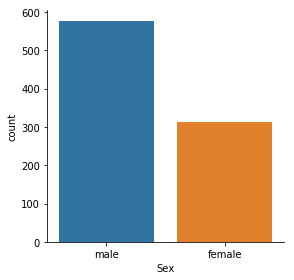

In [198]:
#Shows passagers on board according to gender rate
sns.factorplot('Sex', data = titanic_df, kind = 'count')
print ("The findings in the bar graph shows more males boarded than females")

males = passengers[passengers.Sex == 'male']
females = passengers[passengers.Sex == 'female']


#Printhe number of males and females who were on board
print('Male: ',males.count()['Sex'])
print('Female: ',females.count()['Sex'])


### QUESTION 2 : How many passangers survived on the Titanic?

The findings in the bar graph shows less passangers survived


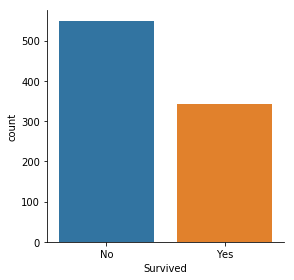

In [199]:
g= sns.factorplot('Survived', data = titanic_df, kind = 'count')
g.set_xticklabels(["No", "Yes"])
print ("The findings in the bar graph shows less passangers survived")

### Question 3: Which gender had a better chance of survival?

Survival according to Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

The finding shows that female had more survival rate than male


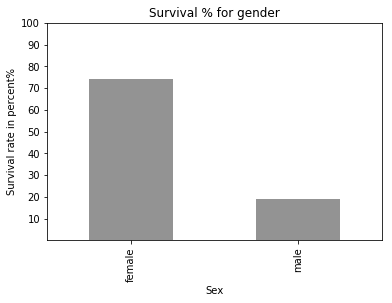

In [211]:
#calculating survival rates per gender in percent
passengers= titanic_df
survival_sex = passengers.groupby('Sex')['Survived'].mean()*100 #multiply times 100 for percent
print('Survival according to' ,survival_sex )
print("")

#plot bar graph
ax = survival_sex.plot(
    title='Survival % for gender', 
    kind='bar',
    yticks=[10,20,30,40,50,60,70,80,90,100],   
    color=[c_lightgrey]
)

#set labels for axis
ax.set_xlabel("Sex")
ax.set_ylabel("Survival rate in percent%")
print ("The finding shows that female had more survival rate than male")

### Question 4: Total number of people per travel class

In [212]:
class1 = passengers[passengers.Pclass == 1]
class2 = passengers[passengers.Pclass == 2]
class3 = passengers[passengers.Pclass == 3]

print("Total passangers per travel class")
print("")
#print the number of passengers in the 1st,2nd, and 3rd class
print('1st class passengers: ',class1.count()['Pclass'])
print('2nd class passengers: ',class2.count()['Pclass'])
print('3rd class passengers: ',class3.count()['Pclass'])

Total passangers per travel class

1st class passengers:  216
2nd class passengers:  184
3rd class passengers:  491


### Question 5: What is the percantage% of people survived for each travel class

Travel class definations
1st = Upper
2nd = Middle
3rd = Lower

The findings shows that more passangers survived were from 1st class
Passangers from 2nd class had more chance as well than 3rd class passangers


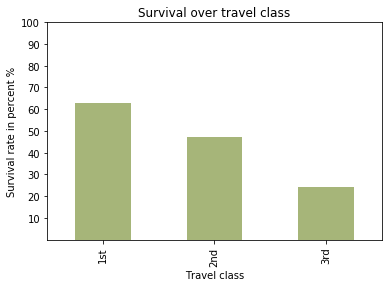

In [213]:
#plot bar graph
ax = survival_pclass.plot( 
    title='Survival over travel class', 
    kind='bar',
    yticks=[10,20,30,40,50,60,70,80,90,100],
    color=c_green)

#set labels for axis
ax.set_xlabel("Travel class")
ax.set_ylabel("Survival rate in percent %")
ax.set_xticklabels(['1st', '2nd', '3rd'])
print("The findings shows that more passangers survived were from 1st class")
print("Passangers from 2nd class had more chance as well than 3rd class passangers")

### Question 6 :Survival gender by class

The findings shows that females had more chances to survive from all cabin class


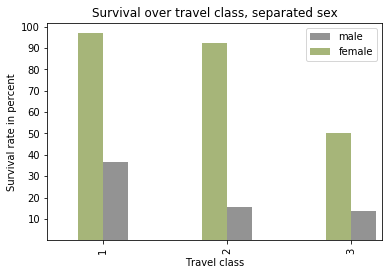

In [215]:
#grouping, multiply times 100 for percent
survival_sex_class = passengers.groupby(['Sex','Pclass'])['Survived'].mean()*100 


#plot bar graph men
survival_sex_class.loc['male'].plot( 
    kind='bar',
    yticks=[10,20,30,40,50,60,70,80,90,100],
    color=c_lightgrey,
    position = 0,
    width=0.2,
    legend=True,
    label='male',)

#plot bar graph women
ax = survival_sex_class.loc['female'].plot( 
    title='Survival over travel class, separated sex', 
    kind='bar',
    yticks=[10,20,30,40,50,60,70,80,90,100],
    color=c_green,
    position = 1,
    width=0.2,
    legend=True,
    label='female',)


#set labels for axis
ax.set_xlabel("Travel class")
ax.set_ylabel("Survival rate in percent")

print("The findings shows that females had more chances to survive from all cabin class")

### Question 7 : Which age group had a better chance of survival?

The findings on the graph shows passangers on board according to their age
Graph shows that the majority of passagers boarded were mostly in the age of 20's to 30's


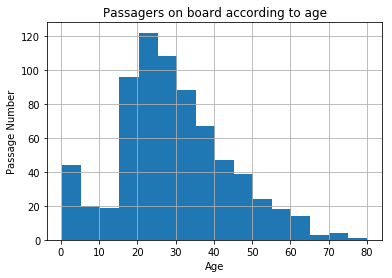

In [216]:
#This shows a number of people according to age that boarded on the titanic
age_hist = titanic_df['Age'].hist(bins=16)
plt.xlabel('Age')
plt.ylabel('Passage Number')
plt.title('Passagers on board according to age')

print("The findings on the graph shows passangers on board according to their age")
print("Graph shows that the majority of passagers boarded were mostly in the age of 20's to 30's")

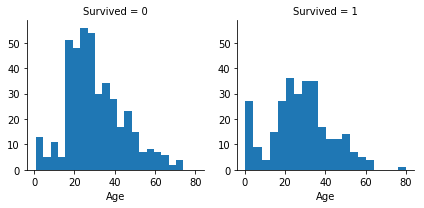

In [217]:
g = sns.FacetGrid(titanic_df, col ='Survived')
g.map(plt.hist, 'Age', bins=20)

### FIX THIS GRAPH

#The findings shows that babies and children had more survival rate than adults


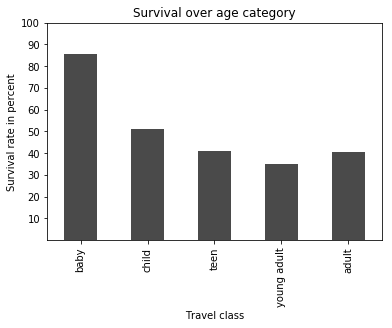

In [105]:
#plot bar graph
ax = survival_ageCategory.plot( 
    title='Survival over age category', 
    kind='bar',
    yticks=[10,20,30,40,50,60,70,80,90,100],
    color=c_darkgray)

#set labels for axis
ax.set_xlabel("Travel class")
ax.set_ylabel("Survival rate in percent")

### Question 8 : What are the survival chances of people travelling alone or with:
>Spouse
>Freinds
>Cousins
>Or Other 

Alone_or_family
Alone     537
Family    354
Name: PassengerId, dtype: int64


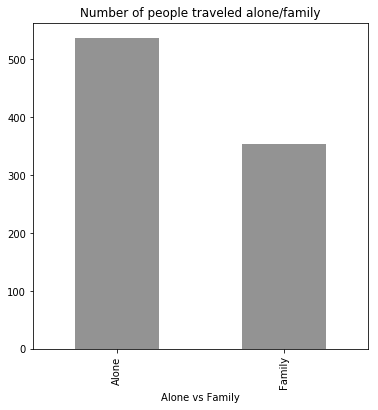

In [222]:
family = titanic_df.groupby('Alone_or_family')['PassengerId'].count()
#counting the number of passagers that travelled alone or with family
family.plot(kind="bar", figsize=(6, 6), color=c_lightgrey, title="Number of people traveled alone/family").set_xlabel("Alone vs Family")
print(titanic_df.groupby('Alone_or_family')['PassengerId'].count())


### Question 9 : What titles were people on board ?

In [228]:
def get_titles():
    global titanic_df

    # we extract the title from each name
    titanic_df['Title'] = titanic_df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

    # Map of Aggregated titles
    Title_Dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royal",
        "Don": "Royal",
        "Sir": "Royal",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royal",
        "Dona": "Royal",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royal"

    }

    # we map each title
    titanic_df['Title'] = titanic_df.Title.map(Title_Dictionary)

get_titles()


print("Possible Titles: ")
print(titanic_df.Title.unique())


Possible Titles: 
['Mr' 'Mrs' 'Miss' 'Master' 'Royal' 'Officer']


### Question 9 : What are survival rates according to passanger titles ?

The findings show title Mrs had more survival chances than title Mr and officer


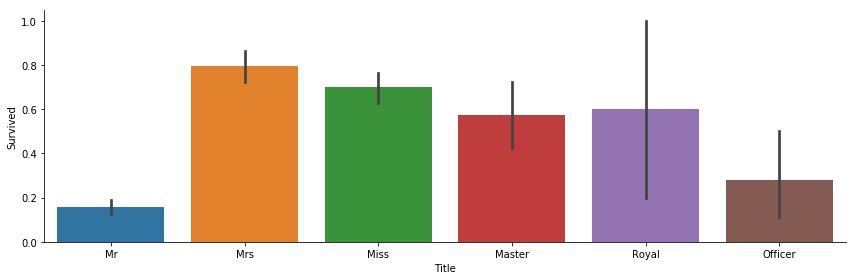

In [262]:
sns.factorplot('Title','Survived',data = titanic_df, kind = 'bar', aspect = 3)
plt.xlabel("Title")
print('The findings show title Mrs had more survival chances than title Mr and officer')
plt.show()


## Conclusion:

 * Class
    * Report shows that people on the first class were more like to survive then people on the third class
            
* Age
  * Children were given more priorty for rescue
  * Children were more likely to survive than the other age groups, and there were a lot more younger survivors
   
* Gender
  
  * Female and child were more likely to survive than male, The graphs or analysis shows an increased survival rate of these two groups.
  * Title Mrs and Miss had more survival rate than Mr and MASTER

The results of the analysis indicate that more people from the 1st class cabin were more saved than the 2nd and 3rd travelling class.
Also shows that females and children had the first priority to survival chance accross all travelling class, and males especially on the 3rd class had less chance of survival. The analysis also shows that people travelling alone had a better chance of survival than people travelling with family